# MOWNIT
## Lab 4a
Jakub Karbowski

In [1]:
using Plots
using Interact
using DataFrames

WebIO._IJuliaInit()

In [2]:
function approx(xs, ys, m)
    G = [ sum( @. xs ^ (i+j) )
          for i=0:m,
              j=0:m ]
    
    B = [ sum( @. ys * xs^i )
          for i=0:m ]
    
    A = G \ B
    
    function (x)
        sum([ A[j+1] * x^j
        for j=0:m ])
    end
end

approx (generic function with 1 method)

In [3]:
sqerr(f, g, x) = sum( @. (f(x) - g(x))^2 )

sqerr (generic function with 1 method)

In [4]:
f(x) = exp(-2sin(x)) + 2cos(x)

xlo = -3pi
xhi = 3pi
xs = range(xlo, xhi, length=1000)

-9.42477796076938:0.018868424345884642:9.42477796076938

In [5]:
@manipulate for n=2:100, m=0:20
    nodes = range(xlo, xhi, length=n)

    g = approx(nodes, f.(nodes), m)
    
    plot(
        xs,
        f.(xs),
        label="f(x)",
        legend=:outerbottom,
        line=:dash,
    )
    
    scatter!(
        nodes,
        f.(nodes),
        label="Nodes (n=$n)",
    )
    
    plot!(
        xs,
        g.(xs),
        label="g(x) (m=$m)",
    )
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 100, :min => 2, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/carbon/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/carbon/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/carbon/.julia/packages/InteractBase/h8Fwe/src/../assets/all.js"), Asset("css", nothing, "/Users/carbon/.julia/packages/InteractBase/h8Fwe/src/../assets/style.css"), Asset("css", nothing, "/Users/carbon/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000016b5eab60, Task (runnable) @0x000000016b5eab60), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41

# Tabelki

In [6]:
function trialn(ns, m)
    dferr = DataFrame(n = [], err = [])
    for n = ns
        nodes = range(xlo, xhi, length=n)

        s = approx(nodes, f.(nodes), m)
        err = sqerr(f, s, xs)
        push!(dferr, (n, err))
    end
    
    plt = plot(
        dferr[!, :n],
        dferr[!, :err],
        xlabel="n",
        ylabel="err",
        legend=false,
        title="m=$m",
    )
    
    dferr, plt
end

function trialm(n, ms)
    dferr = DataFrame(m = [], err = [])
    for m = ms
        nodes = range(xlo, xhi, length=n)

        s = approx(nodes, f.(nodes), m)
        err = sqerr(f, s, xs)
        push!(dferr, (m, err))
    end

    plt = plot(
        dferr[!, :m],
        dferr[!, :err],
        xlabel="m",
        ylabel="err",
        legend=false,
        title="n=$n",
    )
    
    dferr, plt
end

function coolplot(ns, ms)
    plt = plot(
        xlabel="n",
        ylabel="err",
    )
    
    for m = ms
        dferr, _ = trialn(ns, m)
        plot!(plt,
            dferr[!, :n],
            dferr[!, :err],
            label="m=$m",
        )
    end
    
    plt
end

coolplot (generic function with 1 method)

# 1

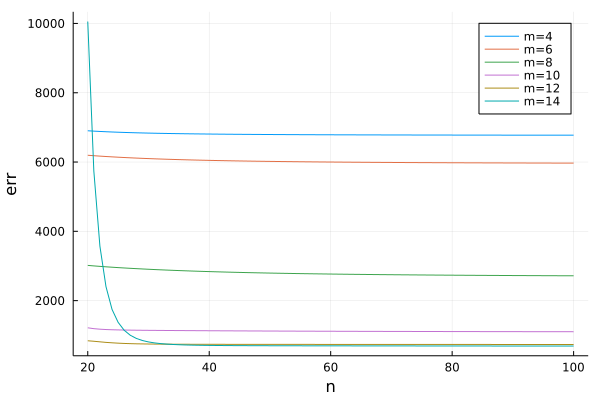

In [7]:
coolplot(20:100, 4:2:14)

# 2

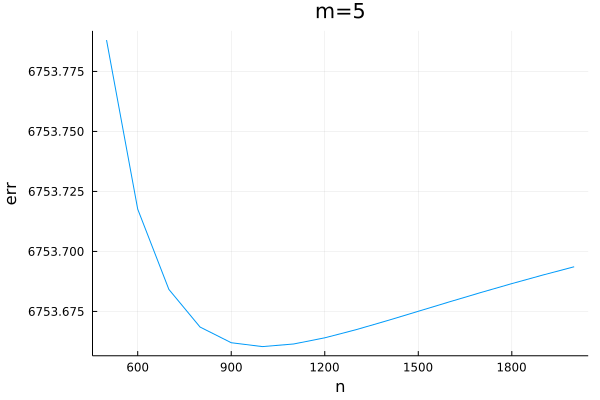

In [8]:
n = 500:100:2000
m = 5
trialn(n, m)[2]

# 3

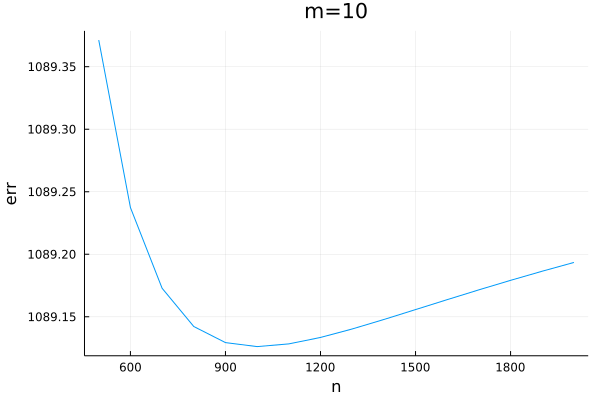

In [9]:
n = 500:100:2000
m = 10
trialn(n, m)[2]

# 4

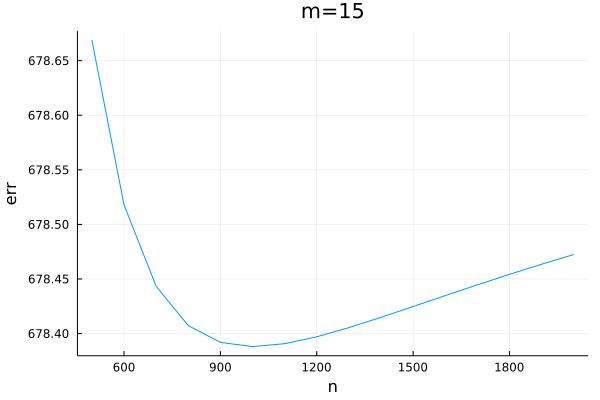

In [10]:
n = 500:100:2000
m = 15
trialn(n, m)[2]

# 5

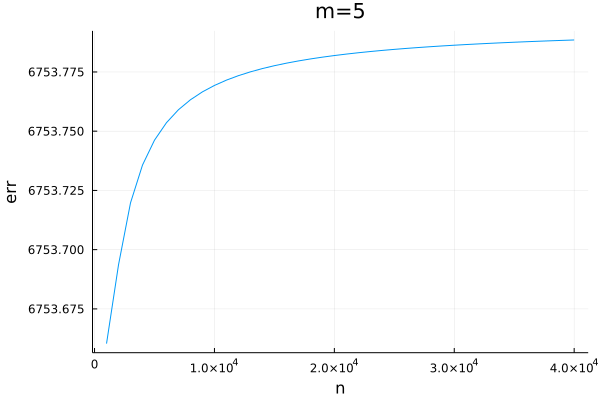

In [11]:
n = 1000:1000:40000
m = 5
trialn(n, m)[2]

# 6

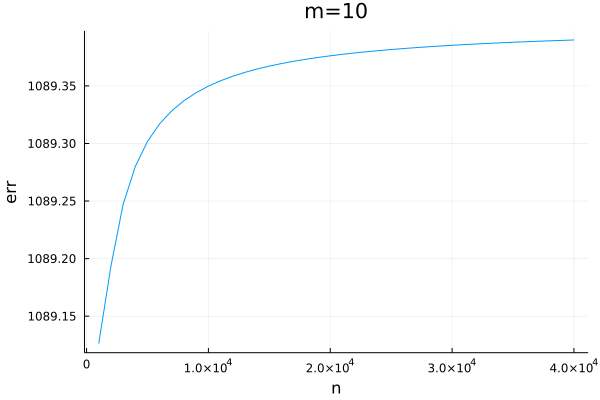

In [12]:
n = 1000:1000:40000
m = 10
trialn(n, m)[2]

# 7

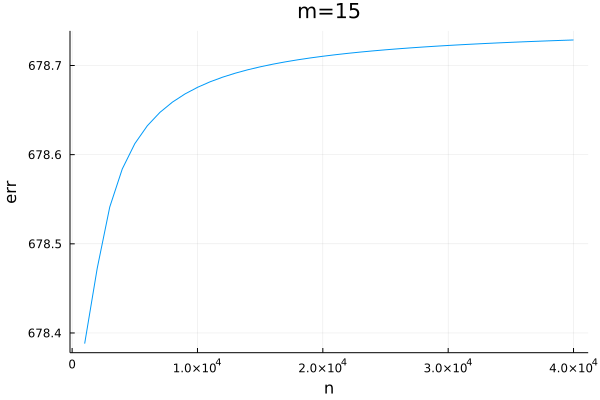

In [13]:
n = 1000:1000:40000
m = 15
trialn(n, m)[2]

# 8

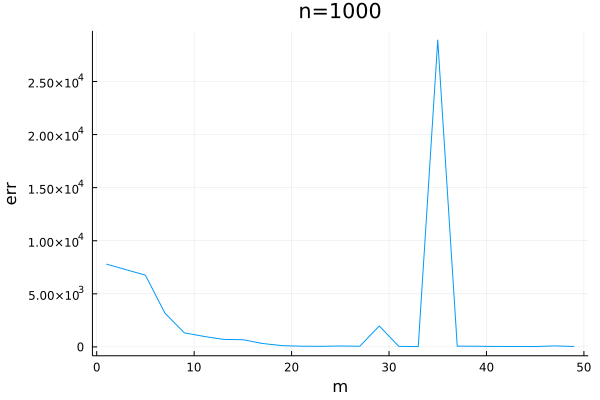

In [14]:
n = 1000
m = 1:2:50
trialm(n, m)[2]

In [15]:
n = 1000
m = 5:5:50
trialm(n, m)[1]

,m,err
,Any,Any
1,5,6753.66
2,10,1089.13
3,15,678.388
4,20,72.1771
5,25,85.007
6,30,43.5297
7,35,28903.1
8,40,58.4136
9,45,33.3856


# 9

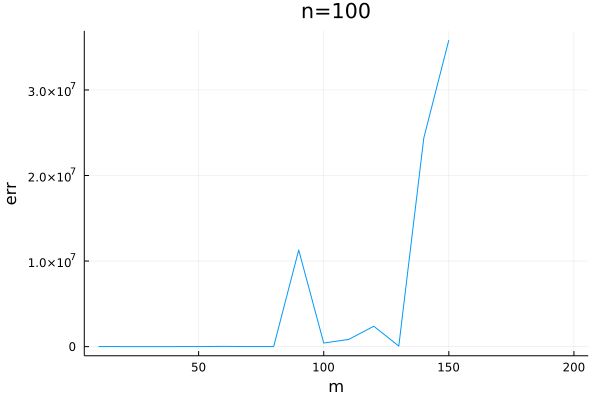

In [16]:
n = 100
m = 10:10:200
trialm(n, m)[2]

In [17]:
n = 100
m = 10:20:200
trialm(n, m)[1]

,m,err
,Any,Any
1,10,1101.54
2,30,79.7407
3,50,1232.72
4,70,878.973
5,90,1.12892e7
6,110,8.4255e5
7,130,60778.3
8,150,3.58318e7
9,170,NaN
